# DEEP LEARNING PROJECT 1
---

In [1]:
%load_ext autoreload
%autoreload 2 

import helpers
import config

from models.basic_net import BasicNet
from datasets import PairDataset

import torch.nn as nn
import torch.utils.data as data
import matplotlib.pyplot as plt

from models.ANN import ANNModel
from models.siamese_net import siamese_net
from torchsummary import summary

from models.train_ANN import train_ann
from models.train_ANN import test_ann

from models.train_Siamese import train_siamese
from models.train_Siamese import test_siamese

## Parameters

In [19]:
TRAIN_BATCH_SIZE = 5
CRITERION_DOUBLE = nn.BCELoss()
CRITERION_SINGLE = nn.BCELoss()
EPOCHS = 20
LEARNING_RATE = 0.001

## Load data

In [20]:
pairs = helpers.generate_pair_sets(config.NB_SAMPLES)

train_dataset = PairDataset(pairs[0], pairs[1], pairs[2])
train_dataloader = data.DataLoader(dataset=train_dataset, batch_size=TRAIN_BATCH_SIZE, shuffle=True)

test_dataset = PairDataset(pairs[3], pairs[4], pairs[5])
test_dataloader = data.DataLoader(dataset=test_dataset, batch_size=config.TEST_BATCH_SIZE, shuffle=True)

## Model 1: Simple model

In [17]:
model1 = ANNModel(input_dim = 2*14*14, hidden_dim = 512, output_dim = 1)

In [18]:
summary(model1, (1 ,2, 14, 14)) 

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                  [-1, 512]         201,216
            Linear-2                  [-1, 512]         262,656
            Linear-3                  [-1, 512]         262,656
            Linear-4                    [-1, 1]             513
Total params: 727,041
Trainable params: 727,041
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.01
Params size (MB): 2.77
Estimated Total Size (MB): 2.79
----------------------------------------------------------------


In [19]:
print("Training with a batch size {0}".format(TRAIN_BATCH_SIZE))

training_losses, training_acc= train_ann(model = model1, dataloader=train_dataloader, learning_rate=LEARNING_RATE, epochs=EPOCHS, criterion=CRITERION_SINGLE)

Training with a batch size 1
Training with 20 epochs, learning rate of 0.001 and BCELoss() as loss function
[Epoch 1, Batch 0/1000]:  [Loss: 0.01]
[Epoch 1, Batch 250/1000]:  [Loss: 27.63]
[Epoch 1, Batch 500/1000]:  [Loss: 27.63]
[Epoch 1, Batch 750/1000]:  [Loss: 27.63]
At epoch 1 the total loss is 15.58391000137478
At epoch 1 the accuracy is 0.436
[Epoch 2, Batch 0/1000]:  [Loss: 0.00]
[Epoch 2, Batch 250/1000]:  [Loss: 27.63]
[Epoch 2, Batch 500/1000]:  [Loss: 0.00]
[Epoch 2, Batch 750/1000]:  [Loss: 27.63]
At epoch 2 the total loss is 15.583896125793457
At epoch 2 the accuracy is 0.436
[Epoch 3, Batch 0/1000]:  [Loss: 27.63]
[Epoch 3, Batch 250/1000]:  [Loss: 0.00]
[Epoch 3, Batch 500/1000]:  [Loss: 0.00]
[Epoch 3, Batch 750/1000]:  [Loss: 27.63]
At epoch 3 the total loss is 15.583896125793457
At epoch 3 the accuracy is 0.436
[Epoch 4, Batch 0/1000]:  [Loss: 27.63]
[Epoch 4, Batch 250/1000]:  [Loss: 27.63]
[Epoch 4, Batch 500/1000]:  [Loss: 27.63]


KeyboardInterrupt: 

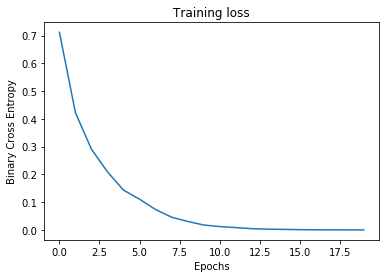

In [16]:
plt.plot(training_losses)
plt.xlabel('Epochs')
plt.ylabel('Binary Cross Entropy')
plt.title('Training loss')
plt.show()

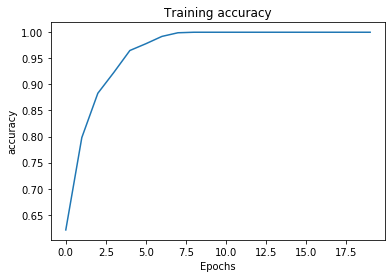

In [17]:
plt.plot(training_acc)
plt.title('Training accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()

We now need to try the model on the test set.

In [22]:
test_ann(model1,test_dataloader, config.CRITERION_SINGLE)

(0.8191723227500916, 0.807)

## Model 2 : Siamese Net

### Architecture 1

**Options 1** : No weight Sharing, No auxilary function

In [23]:
model2 = siamese_net(weight_sharing = False, architecture = 1)

In [24]:
summary(model2, [(1, 14, 14), (1, 14, 14)])

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 1, 12, 12]              10
         LeakyReLU-2            [-1, 1, 12, 12]               0
            Conv2d-3            [-1, 1, 10, 10]              10
         LeakyReLU-4            [-1, 1, 10, 10]               0
         MaxPool2d-5              [-1, 1, 5, 5]               0
            Linear-6                  [-1, 512]          13,312
         LeakyReLU-7                  [-1, 512]               0
            Linear-8                   [-1, 10]           5,130
           Softmax-9                   [-1, 10]               0
           Conv2d-10            [-1, 1, 12, 12]              10
        LeakyReLU-11            [-1, 1, 12, 12]               0
           Conv2d-12            [-1, 1, 10, 10]              10
        LeakyReLU-13            [-1, 1, 10, 10]               0
        MaxPool2d-14              [-1, 

C:\Users\Ridha\Anaconda3\lib\site-packages\torch\nn\modules\container.py:92: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


In [25]:
lr = 0.001
aux_loss = False 
epochs = 30

training_losses, training_acc = train_siamese(model2, train_dataloader, epochs, lr, aux_loss)

Start training with 30 epochs, a learning rate of 0.001 and BCELoss() as loss function
Without auxilary loss function
Without weight sharing
[Epoch 1, Batch 0/1000]:  [Loss: 0.65]
[Epoch 1, Batch 250/1000]:  [Loss: 0.65]
[Epoch 1, Batch 500/1000]:  [Loss: 0.60]
[Epoch 1, Batch 750/1000]:  [Loss: 0.77]
At epoch 1 the loss is 0.6822404265403748
At epoch 1 the accuracy is 0.6
[Epoch 2, Batch 0/1000]:  [Loss: 0.62]
[Epoch 2, Batch 250/1000]:  [Loss: 0.85]
[Epoch 2, Batch 500/1000]:  [Loss: 0.68]
[Epoch 2, Batch 750/1000]:  [Loss: 0.50]
At epoch 2 the loss is 0.6731359958648682
At epoch 2 the accuracy is 0.612
[Epoch 3, Batch 0/1000]:  [Loss: 0.92]
[Epoch 3, Batch 250/1000]:  [Loss: 0.52]
[Epoch 3, Batch 500/1000]:  [Loss: 0.57]
[Epoch 3, Batch 750/1000]:  [Loss: 0.62]
At epoch 3 the loss is 0.6630438566207886
At epoch 3 the accuracy is 0.632
[Epoch 4, Batch 0/1000]:  [Loss: 0.94]
[Epoch 4, Batch 250/1000]:  [Loss: 0.57]
[Epoch 4, Batch 500/1000]:  [Loss: 0.98]
[Epoch 4, Batch 750/1000]:  [

KeyboardInterrupt: 

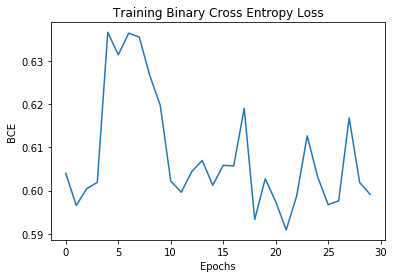

In [34]:
plt.plot(training_losses)
plt.title('Training Binary Cross Entropy Loss')
plt.xlabel("Epochs")
plt.ylabel("BCE")
plt.show()

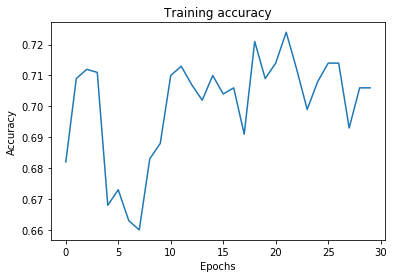

In [35]:
plt.plot(training_acc)
plt.title('Training accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()

In [37]:
test_loss ,test_acc = test_siamese(model2, test_dataloader, aux_loss = False)
print("On the test set we obtain a loss of {:.2f} and an accuracy of {:.2f}".format(test_loss,test_acc))

On the test set we obtain a loss of 0.63 and an accuracy of 0.68


**Options 2** : Weight Sharing, No auxilary function

In [4]:
model2 = siamese_net(weight_sharing = True , architecture = 1)

In [7]:
lr = 0.001
aux_loss = False 
epochs = 30

training_losses, training_acc = train_siamese(model2, train_dataloader, epochs, lr, aux_loss)

Start training with 30 epochs, a learning rate of 0.001 and BCELoss() as loss function
Without auxilary loss funciton
With weight sharing
[Epoch 1, Batch 0/1000]:  [Loss: 0.65]
[Epoch 1, Batch 250/1000]:  [Loss: 0.52]
[Epoch 1, Batch 500/1000]:  [Loss: 0.56]
[Epoch 1, Batch 750/1000]:  [Loss: 0.61]
At epoch 1 the loss is 0.6642462611198425
At epoch 1 the accuracy is 0.622
[Epoch 2, Batch 0/1000]:  [Loss: 0.82]
[Epoch 2, Batch 250/1000]:  [Loss: 0.59]
[Epoch 2, Batch 500/1000]:  [Loss: 0.45]
[Epoch 2, Batch 750/1000]:  [Loss: 0.61]
At epoch 2 the loss is 0.6445934772491455
At epoch 2 the accuracy is 0.651
[Epoch 3, Batch 0/1000]:  [Loss: 0.78]
[Epoch 3, Batch 250/1000]:  [Loss: 0.59]
[Epoch 3, Batch 500/1000]:  [Loss: 0.80]
[Epoch 3, Batch 750/1000]:  [Loss: 0.62]
At epoch 3 the loss is 0.6729118227958679
At epoch 3 the accuracy is 0.573
[Epoch 4, Batch 0/1000]:  [Loss: 0.62]
[Epoch 4, Batch 250/1000]:  [Loss: 0.60]
[Epoch 4, Batch 500/1000]:  [Loss: 0.97]
[Epoch 4, Batch 750/1000]:  [L

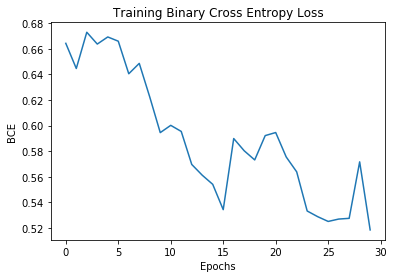

In [8]:
plt.plot(training_losses)
plt.title('Training Binary Cross Entropy Loss')
plt.xlabel("Epochs")
plt.ylabel("BCE")
plt.show()

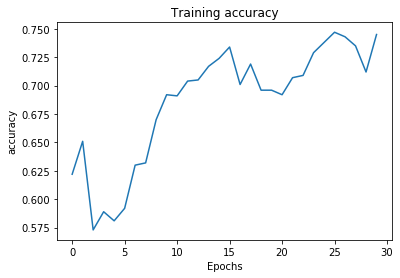

In [9]:
plt.plot(training_acc)
plt.title('Training accuracy')
plt.xlabel("Epochs")
plt.ylabel("accuracy")
plt.show()

In [11]:
test_loss ,test_acc = test_siamese(model2, test_dataloader, aux_loss = False)
print("On the test set we obtain a loss of {:.2f} and an accuracy of {:.2f}".format(test_loss,test_acc))

On the test set we obtain a loss of 0.52 and an accuracy of 0.74


**Option 3:**  No weight Sharing, auxilary function

In [12]:
model2 = siamese_net(weight_sharing = False , architecture = 1)

In [14]:
lr = 0.001
aux_loss = True 
epochs = 30

training_losses, training_acc = train_siamese(model2, train_dataloader, epochs, lr, aux_loss)

Start training with 30 epochs, a learning rate of 0.001 and BCELoss() as loss function
With auxilary loss funciton
Without weight sharing
[Epoch 1, Batch 0/1000]:  [Loss: 1.13]
[Epoch 1, Batch 250/1000]:  [Loss: 0.84]
[Epoch 1, Batch 500/1000]:  [Loss: 0.79]
[Epoch 1, Batch 750/1000]:  [Loss: 0.74]
At epoch 1 the loss is 0.7762801647186279
At epoch 1 the accuracy is 0.642
[Epoch 2, Batch 0/1000]:  [Loss: 1.02]
[Epoch 2, Batch 250/1000]:  [Loss: 0.73]
[Epoch 2, Batch 500/1000]:  [Loss: 0.85]
[Epoch 2, Batch 750/1000]:  [Loss: 0.46]
At epoch 2 the loss is 0.6750748753547668
At epoch 2 the accuracy is 0.733
[Epoch 3, Batch 0/1000]:  [Loss: 0.50]
[Epoch 3, Batch 250/1000]:  [Loss: 0.70]
[Epoch 3, Batch 500/1000]:  [Loss: 0.84]
[Epoch 3, Batch 750/1000]:  [Loss: 0.53]
At epoch 3 the loss is 0.6098330616950989
At epoch 3 the accuracy is 0.8
[Epoch 4, Batch 0/1000]:  [Loss: 0.43]
[Epoch 4, Batch 250/1000]:  [Loss: 1.10]
[Epoch 4, Batch 500/1000]:  [Loss: 0.67]
[Epoch 4, Batch 750/1000]:  [Los

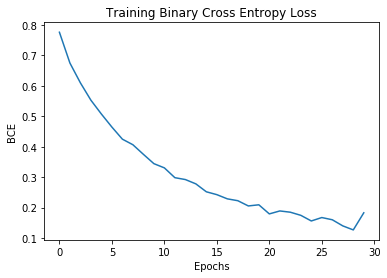

In [15]:
plt.plot(training_losses)
plt.title('Training Binary Cross Entropy Loss')
plt.xlabel("Epochs")
plt.ylabel("BCE")
plt.show()

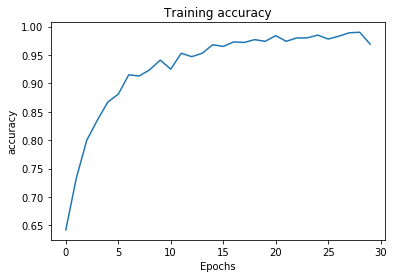

In [16]:
plt.plot(training_acc)
plt.title('Training accuracy')
plt.xlabel("Epochs")
plt.ylabel("accuracy")
plt.show()

In [19]:
test_loss ,test_acc = test_siamese(model2, test_dataloader, aux_loss = True)
print("On the test set we obtain a loss of {:.2f} and an accuracy of {:.2f}".format(test_loss,test_acc))

On the test set we obtain a loss of 0.56 and an accuracy of 0.83


**Option 4:**  Weight Sharing, auxilary function

In [21]:
model2 = siamese_net(weight_sharing = True , architecture = 1)

In [22]:
lr = 0.001
aux_loss = True 
epochs = 20

training_losses, training_acc = train_siamese(model2, train_dataloader, epochs, lr, aux_loss)

Start training with 20 epochs, a learning rate of 0.001 and BCELoss() as loss function
With auxilary loss function
With weight sharing
[Epoch 1, Batch 0/200]:  [Loss: 7.16]
At epoch 1 the loss is 1.904665470123291
At epoch 1 the accuracy is 0.665
[Epoch 2, Batch 0/200]:  [Loss: 1.72]
At epoch 2 the loss is 1.1561856269836426
At epoch 2 the accuracy is 0.766
[Epoch 3, Batch 0/200]:  [Loss: 0.35]
At epoch 3 the loss is 0.917246401309967
At epoch 3 the accuracy is 0.813
[Epoch 4, Batch 0/200]:  [Loss: 0.84]
At epoch 4 the loss is 0.7477160692214966
At epoch 4 the accuracy is 0.836
[Epoch 5, Batch 0/200]:  [Loss: 0.47]
At epoch 5 the loss is 0.6435930728912354
At epoch 5 the accuracy is 0.872
[Epoch 6, Batch 0/200]:  [Loss: 0.26]
At epoch 6 the loss is 0.49597328901290894
At epoch 6 the accuracy is 0.907
[Epoch 7, Batch 0/200]:  [Loss: 0.66]
At epoch 7 the loss is 0.4190405607223511
At epoch 7 the accuracy is 0.926
[Epoch 8, Batch 0/200]:  [Loss: 0.30]
At epoch 8 the loss is 0.360334992408

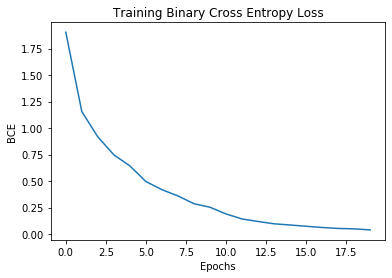

In [23]:
plt.plot(training_losses)
plt.title('Training Binary Cross Entropy Loss')
plt.xlabel("Epochs")
plt.ylabel("BCE")
plt.show()

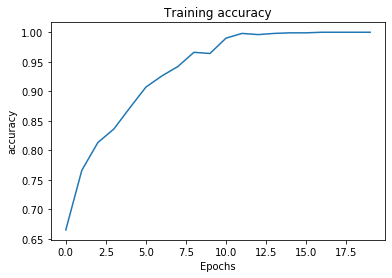

In [24]:
plt.plot(training_acc)
plt.title('Training accuracy')
plt.xlabel("Epochs")
plt.ylabel("accuracy")
plt.show()

In [25]:
test_loss ,test_acc = test_siamese(model2, test_dataloader, aux_loss = True)
print("On the test set we obtain a loss of {:.2f} and an accuracy of {:.2f}".format(test_loss,test_acc))

On the test set we obtain a loss of nan and an accuracy of 0.86


### Architecture 2

In [26]:
model2 = siamese_net(weight_sharing = True , architecture = 2)

In [27]:
lr = 0.001
aux_loss = True 
epochs = 20

training_losses, training_acc = train_siamese(model2, train_dataloader, epochs, lr, aux_loss)

Start training with 20 epochs, a learning rate of 0.001 and BCELoss() as loss function
With auxilary loss function
With weight sharing
[Epoch 1, Batch 0/200]:  [Loss: 10.84]
At epoch 1 the loss is 1.5616161823272705
At epoch 1 the accuracy is 0.706
[Epoch 2, Batch 0/200]:  [Loss: 0.72]
At epoch 2 the loss is 0.6069937348365784
At epoch 2 the accuracy is 0.843
[Epoch 3, Batch 0/200]:  [Loss: 0.14]
At epoch 3 the loss is 0.38132208585739136
At epoch 3 the accuracy is 0.906
[Epoch 4, Batch 0/200]:  [Loss: 0.20]
At epoch 4 the loss is 0.33277589082717896
At epoch 4 the accuracy is 0.928
[Epoch 5, Batch 0/200]:  [Loss: 0.51]
At epoch 5 the loss is 0.1724955141544342
At epoch 5 the accuracy is 0.965
[Epoch 6, Batch 0/200]:  [Loss: 0.04]
At epoch 6 the loss is 0.0893305093050003
At epoch 6 the accuracy is 0.983
[Epoch 7, Batch 0/200]:  [Loss: 0.00]
At epoch 7 the loss is 0.07353179156780243
At epoch 7 the accuracy is 0.99
[Epoch 8, Batch 0/200]:  [Loss: 0.51]
At epoch 8 the loss is 0.03859358

In [28]:
test_loss ,test_acc = test_siamese(model2, test_dataloader, aux_loss = True)
print("On the test set we obtain a loss of {:.2f} and an accuracy of {:.2f}".format(test_loss,test_acc))

On the test set we obtain a loss of nan and an accuracy of 0.93


### Brouillon

To keep in mind after a conv layer we get : (W - F + 2P)/S + 1

In [ ]:
elem = next(iter(train_dataloader))['digit_labels']

In [ ]:
elem

In [ ]:
next(iter(train_dataloader))['images'].shape

In [ ]:
plt.imshow(elem[0,0,:,:], cmap='gray')

In [ ]:
plt.imshow(elem[0,1,:,:], cmap='gray')

In [ ]:
model = BasicNet()

train(model=model, dataloader=train_dataloader, epochs=config.EPOCHS, criterion=config.CRITERION)

In [ ]:
predicted, accuracy = predict(model=model, dataloader=test_dataloader)

In [ ]:
print(accuracy)